# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [4]:
# Your code here

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [5]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly:

In [6]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [7]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [8]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

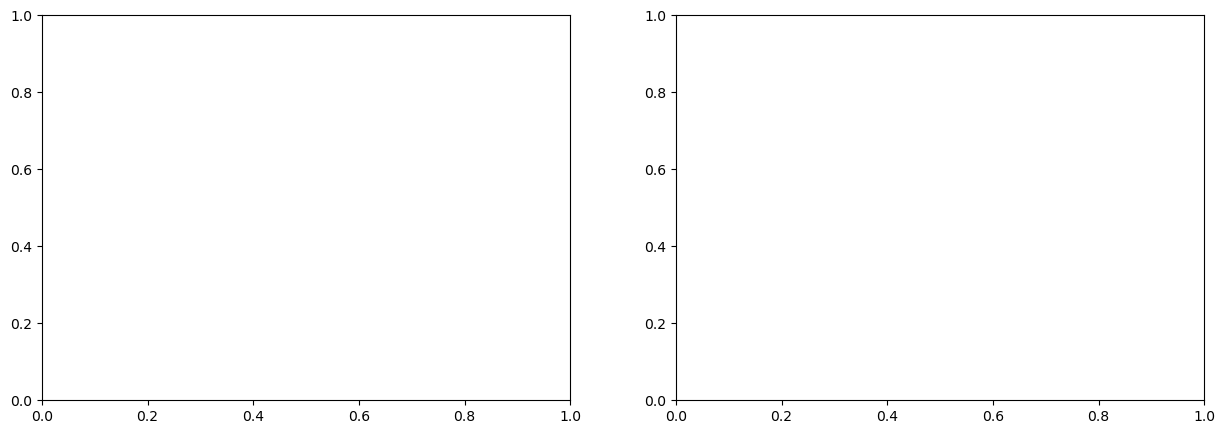

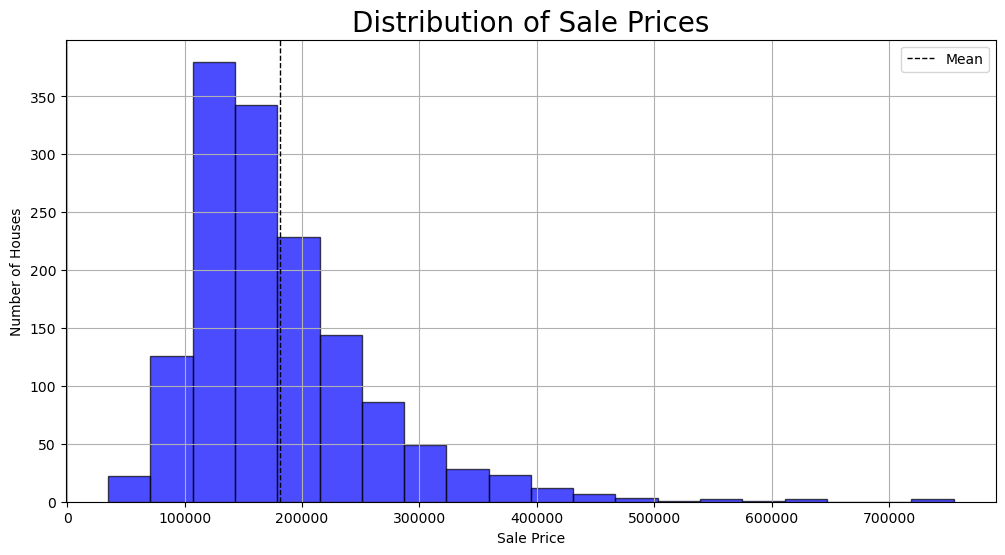

In [9]:
# Your code here
plt.figure(figsize=(12, 6))
plt.hist(df["SalePrice"], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(df["SalePrice"].mean(), color='black', linestyle='dashed', linewidth=1)
plt.title("Distribution of Sale Prices", fontsize=20)
plt.xlabel("Sale Price")
plt.ylabel("Number of Houses")
plt.legend(["Mean"])
plt.grid(True)
plt.show()


Now, print out the mean, median, and standard deviation:

In [10]:
# Your code here

mean_sale_price = df["SalePrice"].mean()
median_sale_price = df["SalePrice"].median()
standard_deviation_sale_price = df["SalePrice"].std()

print(f"Mean Sale Price: {mean_sale_price:.2f}")
print(f"Median Sale Price: {median_sale_price:.2f}")
print(f"Standard Deviation of Sale Price: {standard_deviation_sale_price:.2f}")


Mean Sale Price: 180921.20
Median Sale Price: 163000.00
Standard Deviation of Sale Price: 79442.50


In the cell below, interpret the above information.

In [11]:
# Replace None with appropriate text
"""
The mean sale price is $180,921.20, the median sale price is $163,000.00, and the standard deviation of sale price is $79,442.50. The distribution of sale prices appears to be right-skewed, with the mean($180,921.20) greater than the median($163,000.00). This indicates that there are some very high sale prices that are bringing the mean up, relative to the median.
"""

'\nThe mean sale price is $180,921.20, the median sale price is $163,000.00, and the standard deviation of sale price is $79,442.50. The distribution of sale prices appears to be right-skewed, with the mean($180,921.20) greater than the median($163,000.00). This indicates that there are some very high sale prices that are bringing the mean up, relative to the median.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

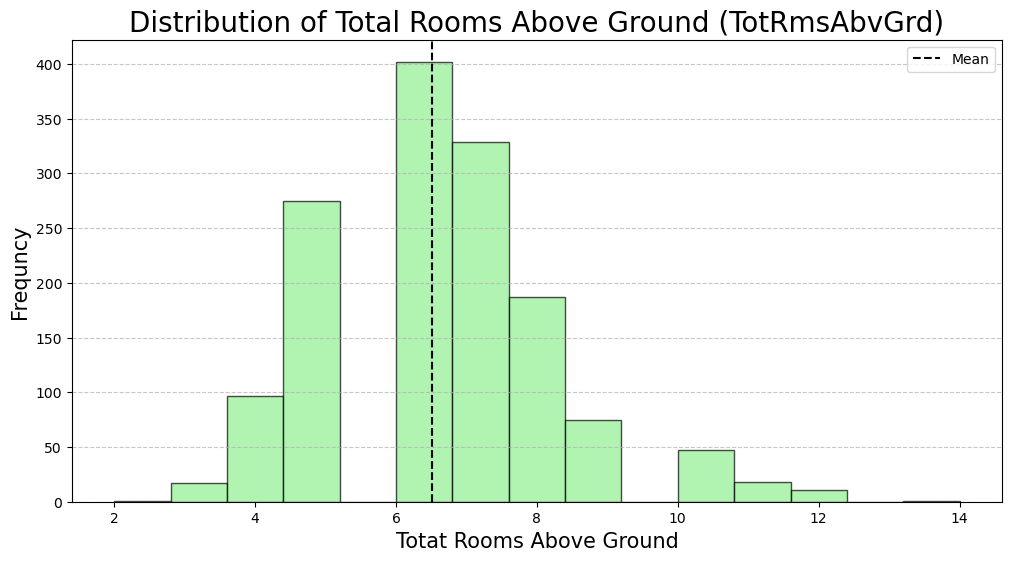

In [12]:
# Your code here
plt.figure(figsize=(12, 6))
plt.hist(df['TotRmsAbvGrd'], bins=15, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(df['TotRmsAbvGrd'].mean(), color='black', linestyle='dashed', linewidth=1.5, label=f"Mean: {df['TotRmsAbvGrd'].mean():.2f}")
plt.title("Distribution of Total Rooms Above Ground (TotRmsAbvGrd)", fontsize=20)
plt.xlabel("Totat Rooms Above Ground", fontsize=15)
plt.ylabel("Frequncy", fontsize=15)
plt.legend(["Mean"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Now, print out the mean, median, and standard deviation:

In [13]:
# Your code here

mean_total_rooms = df['TotRmsAbvGrd'].mean()
median_total_rooms = df['TotRmsAbvGrd'].median()
standard_deviation_total_rooms = df['TotRmsAbvGrd'].std()

print(f"Mean Total Rooms: {mean_total_rooms:.2f}")
print(f"Median Total Rooms: {median_total_rooms:.2f}")
print(f"Standard Deviation of Total Rooms: {standard_deviation_total_rooms:.2f}")

Mean Total Rooms: 6.52
Median Total Rooms: 6.00
Standard Deviation of Total Rooms: 1.63


In the cell below, interpret the above information.

In [14]:
# Replace None with appropriate text
"""
The mean number of total rooms above ground is 6.52, the median is 6.00,(mean and median are close to each other indicating that the distribution of the number of rooms is approximately symmetrical) and the standard deviation is 1.63. The distribution of total rooms above ground appears to be approximately normally distributed, with a slight right skew. The mean and median are very close to each other, indicating that there are no extreme outliers in this dataset.
"""

'\nThe mean number of total rooms above ground is 6.52, the median is 6.00,(mean and median are close to each other indicating that the distribution of the number of rooms is approximately symmetrical) and the standard deviation is 1.63. The distribution of total rooms above ground appears to be approximately normally distributed, with a slight right skew. The mean and median are very close to each other, indicating that there are no extreme outliers in this dataset.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

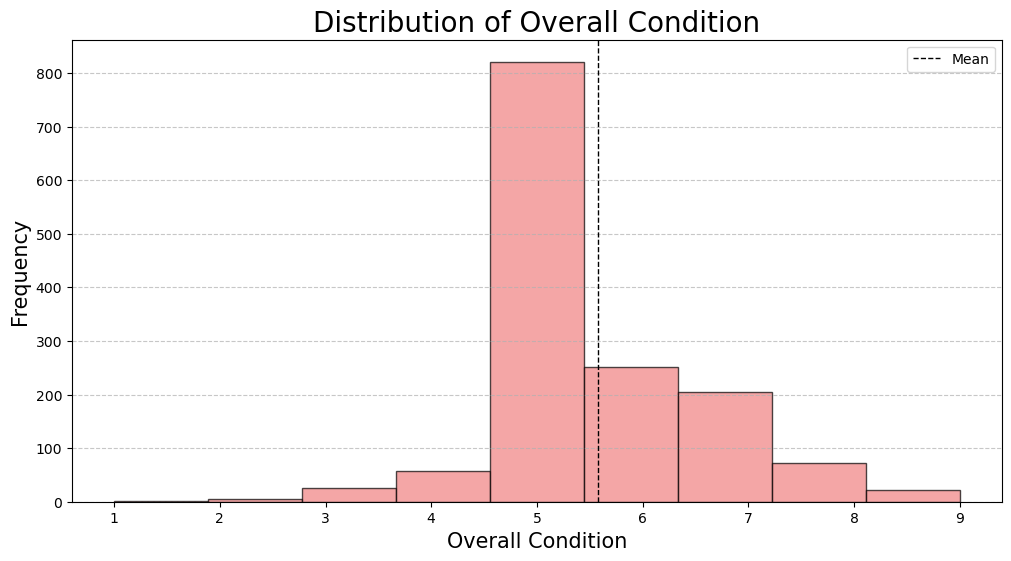

In [15]:
# Your code here
plt.figure(figsize=(12, 6))
plt.hist(df['OverallCond'], bins=9, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(df['OverallCond'].mean(), color='black', linestyle='dashed', linewidth=1)
plt.title("Distribution of Overall Condition", fontsize=20)
plt.xlabel("Overall Condition", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.legend(["Mean"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Now, print out the mean, median, and standard deviation:

In [16]:
# Your code here
mean_overall_condition = df['OverallCond'].mean()
median_overall_condition = df['OverallCond'].median()
standard_deviation_overall_condition = df['OverallCond'].std()

print(f"Mean Overall Condition: {mean_overall_condition:.2f}")
print(f"Median Overall Condition: {median_overall_condition:.2f}")
print(f"Standard Deviation of Overall Condition: {standard_deviation_overall_condition:.2f}")


Mean Overall Condition: 5.58
Median Overall Condition: 5.00
Standard Deviation of Overall Condition: 1.11


In the cell below, interpret the above information.

In [17]:
# Replace None with appropriate text
"""
The mean overall condition is 5.58, the median is 5.00, and the standard deviation is 1.11. The distribution of overall condition appears to be approximately normally distributed, with a slight left skew. The mean and median are very close to each other, indicating that there are no extreme outliers in this dataset.Additionally, the standrd deviation smaller. indicating relative consitency in the data.
"""

'\nThe mean overall condition is 5.58, the median is 5.00, and the standard deviation is 1.11. The distribution of overall condition appears to be approximately normally distributed, with a slight left skew. The mean and median are very close to each other, indicating that there are no extreme outliers in this dataset.Additionally, the standrd deviation smaller. indicating relative consitency in the data.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [18]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [19]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

In [20]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [21]:
# Replace None with appropriate text
"""
This histogram displays the distribution of sale prices for houses with above average, average, and below average overall condition. The distribution of sale prices for houses in above average condition is skewed to the right, with a peak between 200,000 and 300,000. The distribution of sale prices for houses in average condition is also skewed to the right, with a peak between 100,000 and 200,000. The distribution of sale prices for houses in below average condition is skewed to the right, with a peak between 50,000 and 100,000. The distributions of sale prices for houses in each condition category are similar in shape, but differ in terms of the range of sale prices.
"""

'\nThis histogram displays the distribution of sale prices for houses with above average, average, and below average overall condition. The distribution of sale prices for houses in above average condition is skewed to the right, with a peak between 200,000 and 300,000. The distribution of sale prices for houses in average condition is also skewed to the right, with a peak between 100,000 and 200,000. The distribution of sale prices for houses in below average condition is skewed to the right, with a peak between 50,000 and 100,000. The distributions of sale prices for houses in each condition category are similar in shape, but differ in terms of the range of sale prices.\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [22]:
# Your code here

#select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

#calculate the pearson correlation between the two variables
pearson_correlation = numeric_columns.corr()

#column with the most positive correlation with SalePrice (other than SalePrice itself)
most_positive_correlation_column = pearson_correlation['SalePrice'].drop('SalePrice').idxmax()
most_positive_correlation_value = pearson_correlation['SalePrice'].drop('SalePrice').max()

print(most_positive_correlation_column, most_positive_correlation_value)




OverallQual 0.7909816005838054


Now, find the ***most negatively correlated*** column:

In [23]:
# Your code here
#Calculate the pearson corelation for numeric columns
pearson_correlation = numeric_columns.corr()

#column with the most negative correlation with SalePrice (other than SalePrice itself)
most_negative_correlation_column = pearson_correlation['SalePrice'].drop('SalePrice').idxmin()
most_negative_correlation_value = pearson_correlation['SalePrice'].drop('SalePrice').min()

print(most_negative_correlation_column, most_negative_correlation_value)

KitchenAbvGr -0.1359073708421411


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

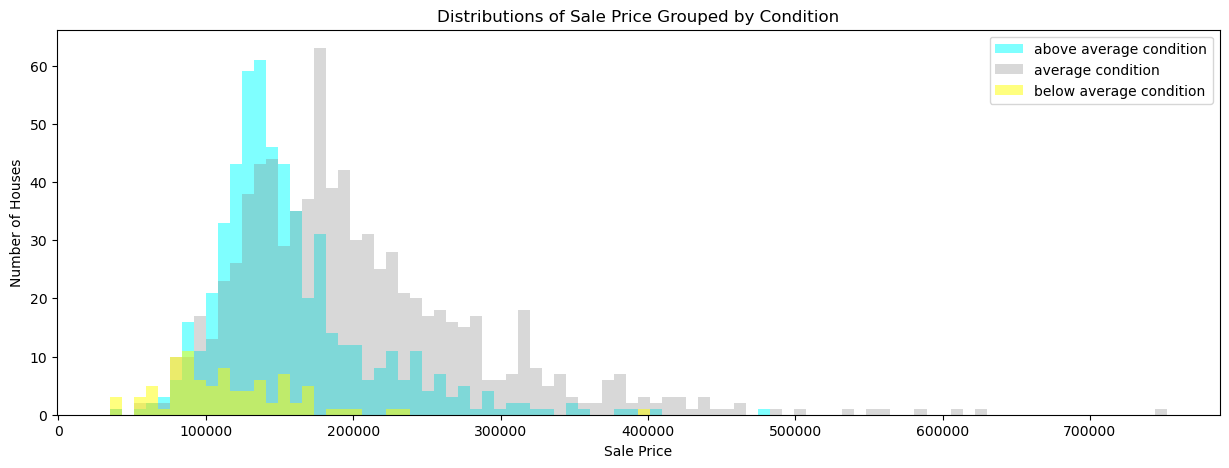

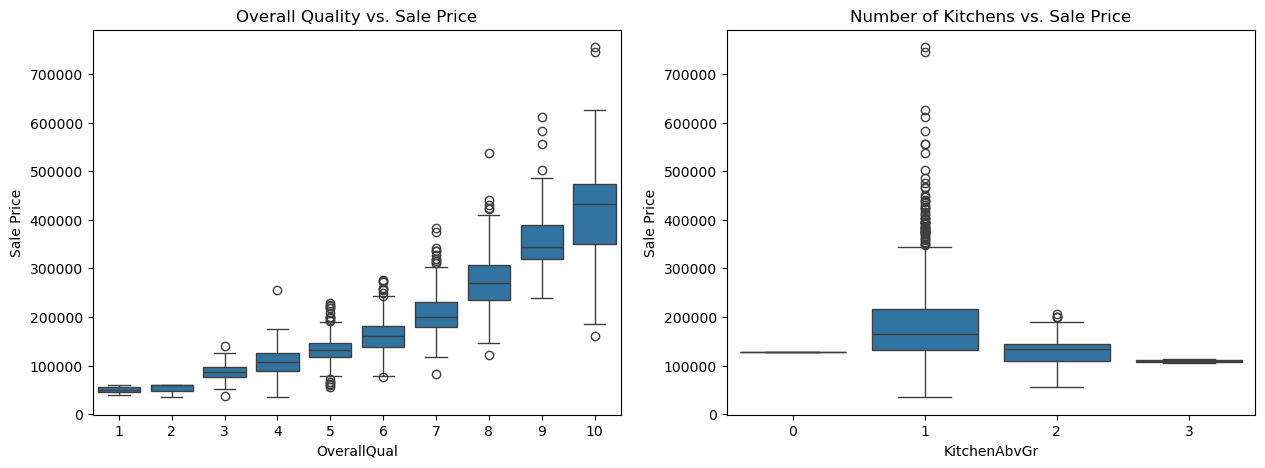

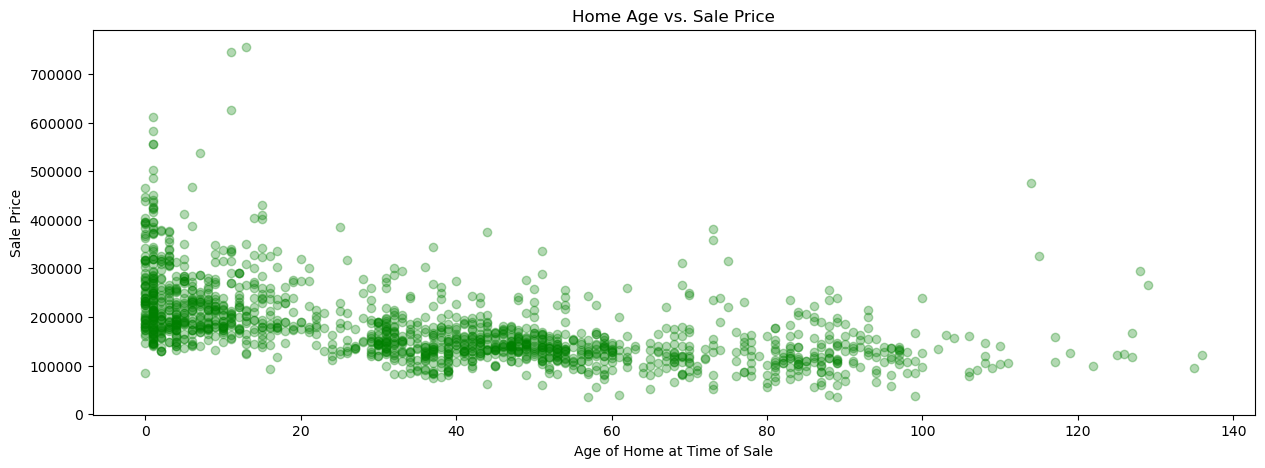

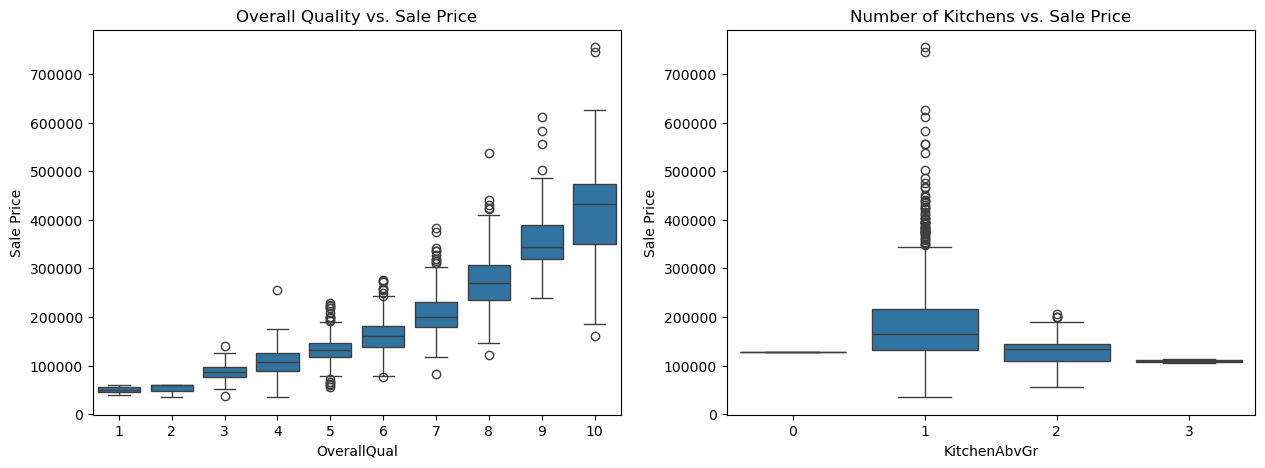

In [29]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x= df["OverallQual"], # most positively correlated column
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x= df["KitchenAbvGr"], # most negatively correlated column
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Overall Quality vs. Sale Price") # most positively correlated column
ax1.set_xlabel("OverallQual") # most positively correlated column
ax1.set_ylabel("Sale Price")
ax2.set_title("Number of Kitchens vs. Sale Price") # most negatively correlated column
ax2.set_xlabel("KitchenAbvGr") # most negatively correlated column
ax2.set_ylabel("Sale Price");
plt.show()

Interpret the results below. Consult `data/data_description.txt` as needed.

In [25]:
# Replace None with appropriate text
"""
The boxplot on the left shows the relationship between overall quality and sale price. As overall quality increases, the sale price also increases. This indicates a positive correlation between overall quality and sale price. The boxplot on the right shows the relationship between the number of kitchens above ground and sale price. There is no clear relationship between the number of kitchens above ground and sale price, indicating a weak or no correlation between these two variables.
"""

'\nNone\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [30]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

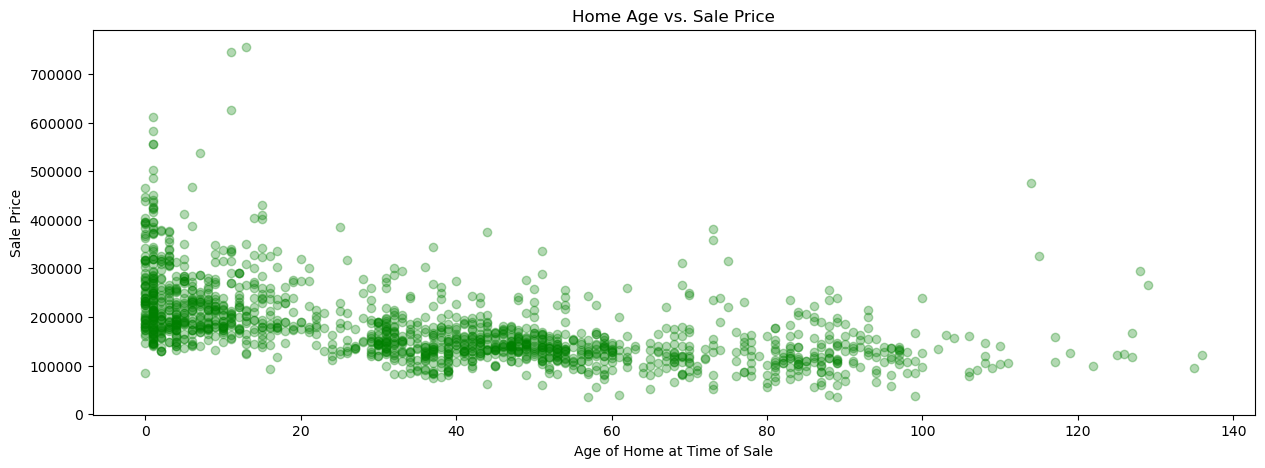

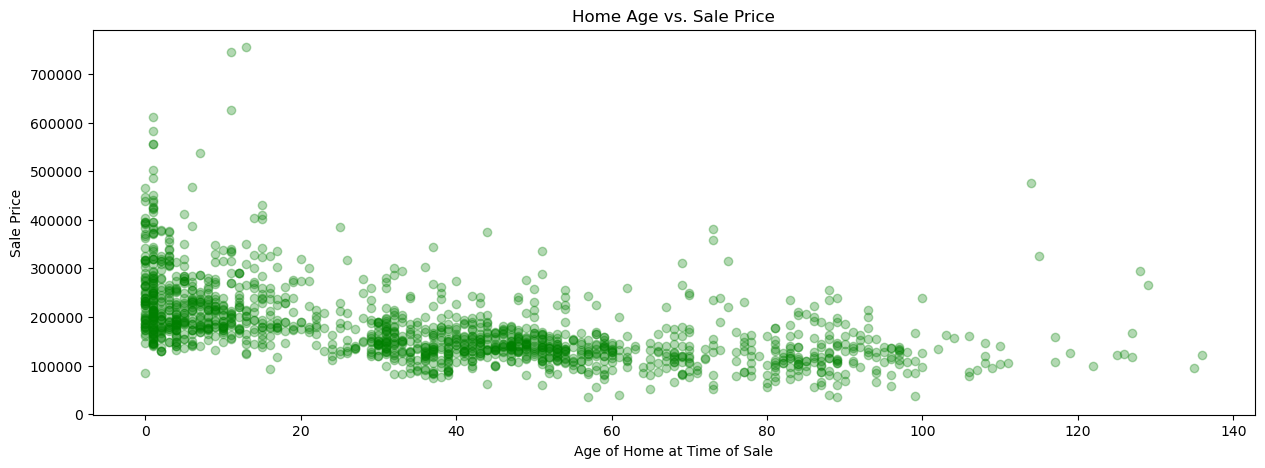

In [32]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");
plt.show()

Interpret this plot below:

In [28]:
# Replace None with appropriate text
"""
The scatter plot above shows the relationship between the age of a home and its sale price. There is no clear relationship between the age of a home and its sale price. The data points are spread out across the plot, with no clear pattern or trend. This indicates that the age of a home is not a strong predictor of its sale price.
"""

'\nNone\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.